## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [24]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [25]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.36850849, 0.63149151])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [26]:
np.sum(weights * log_returns.mean()) * 250

0.1797599909361318

Expected Portfolio Variance:

In [27]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.05380441462685263

Expected Portfolio Volatility:

In [28]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.23195778630356995

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [29]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [30]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.14608962066826173,
  0.16551205121627174,
  0.14464515703945072,
  0.11062572659559537,
  0.15210069817077815,
  0.163534880857414,
  0.13856404669281605,
  0.16881078559786072,
  0.2226487909619156,
  0.17401288723100308,
  0.1370905713696876,
  0.20755146443992087,
  0.16313860756853885,
  0.14268933641981843,
  0.2091996950862753,
  0.12975815393396428,
  0.12063924005198685,
  0.19326683970135664,
  0.17380220448208636,
  0.1314423437613195,
  0.106776388490747,
  0.1532666680508438,
  0.2261918272467566,
  0.1861282939024819,
  0.22679959358290944,
  0.17279242394605698,
  0.18537708227434826,
  0.17324589912146926,
  0.1667960870918451,
  0.12475389827711422,
  0.1494619427650026,
  0.17730491884029279,
  0.14543570752337254,
  0.1578259106286468,
  0.15812149641943646,
  0.10284386762292015,
  0.21051519571797112,
  0.13618516462302474,
  0.0977327780258318,
  0.22213854322409748,
  0.15937106135330692,
  0.1681611435057303,
  0.207566112583596,
  0.1528791021933381,
  0.188

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [31]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.14608962, 0.16551205, 0.14464516, 0.11062573, 0.1521007 ,
        0.16353488, 0.13856405, 0.16881079, 0.22264879, 0.17401289,
        0.13709057, 0.20755146, 0.16313861, 0.14268934, 0.2091997 ,
        0.12975815, 0.12063924, 0.19326684, 0.1738022 , 0.13144234,
        0.10677639, 0.15326667, 0.22619183, 0.18612829, 0.22679959,
        0.17279242, 0.18537708, 0.1732459 , 0.16679609, 0.1247539 ,
        0.14946194, 0.17730492, 0.14543571, 0.15782591, 0.1581215 ,
        0.10284387, 0.2105152 , 0.13618516, 0.09773278, 0.22213854,
        0.15937106, 0.16816114, 0.20756611, 0.1528791 , 0.18802052,
        0.13286954, 0.22713037, 0.15555484, 0.14034905, 0.16474889,
        0.16839776, 0.1418677 , 0.160343  , 0.15139422, 0.11144478,
        0.15902002, 0.19098287, 0.19829951, 0.14850187, 0.16401158,
        0.21513166, 0.11226178, 0.14274045, 0.2034736 , 0.11891516,
        0.16733788, 0.21305766, 0.22708144, 0.21580159, 0.17361466,
        0.15089294, 0.1134961 , 0.21801507, 0.13

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [32]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [33]:
portfolios.head()

,Return,Volatility
0,0.146090,0.196434
1,0.165512,0.213400
2,0.144645,0.195622
3,0.110626,0.196788
4,0.152101,0.200516


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

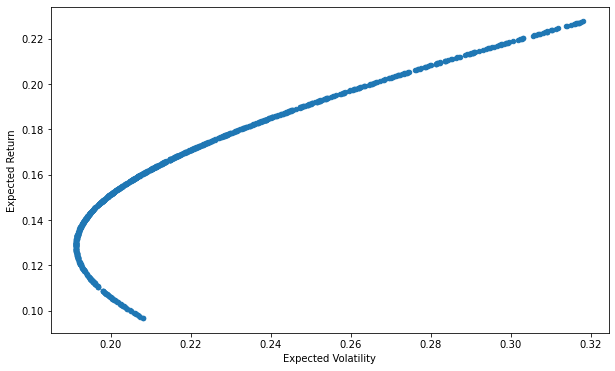

In [34]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [35]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [36]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,66.984100,54.709999,31.725683
2014-01-03,66.763397,54.560001,31.652954
2014-01-06,66.389908,57.200001,31.738913
2014-01-07,66.593628,57.919998,32.102577
2014-01-08,66.067329,58.230000,32.221600


In [37]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns

,WMT,FB,BP
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,-0.003300,-0.002745,-0.002295
2014-01-06,-0.005610,0.047253,0.002712
2014-01-07,0.003064,0.012509,0.011393
2014-01-08,-0.007935,0.005338,0.003701
...,...,...,...
2020-06-30,0.006029,0.028726,-0.006838
2020-07-01,-0.000752,0.045120,-0.004728
2020-07-02,-0.004018,-0.017539,0.008580


In [15]:
num_assets = len(assets)
num_assets

3

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.42412462, 0.2208822 , 0.35499318])

In [17]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.07500068339001789

Expected Portfolio Variance:

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03591305638461169

Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.1895074045640742

*****

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 1.20986655e-01,  3.80042971e-02,  1.09986108e-01,  2.23893624e-02,
         4.55326153e-02,  1.28484876e-01,  1.16726130e-01,  4.12085594e-02,
         6.57582277e-02,  1.20673008e-01,  1.36904087e-01,  8.06122466e-02,
         6.43559483e-02,  8.91787485e-02,  1.42922121e-01,  8.52143764e-02,
         1.45716289e-01,  8.25068587e-02,  1.23335448e-01,  6.25795725e-02,
         8.70478613e-02,  9.64071578e-02,  8.26097616e-02,  3.60233315e-02,
         6.77457799e-02,  9.48185556e-02,  2.95607280e-02,  4.72852037e-02,
         1.04874583e-01,  1.15569776e-01,  1.49077211e-01,  1.26005832e-01,
         1.72064433e-01,  7.77585695e-02,  3.26373279e-02,  8.87605791e-03,
         9.51771433e-02,  7.55613839e-02,  9.25608326e-02,  9.26824550e-02,
         8.35558352e-02,  1.33113551e-01,  9.99264021e-02,  3.29835992e-02,
         6.37937082e-02, -3.97305576e-03,  1.47038001e-01,  3.90701643e-02,
         2.11116132e-03,  1.78581073e-01,  6.17222477e-02,  1.07923613e-01,
         5.7

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

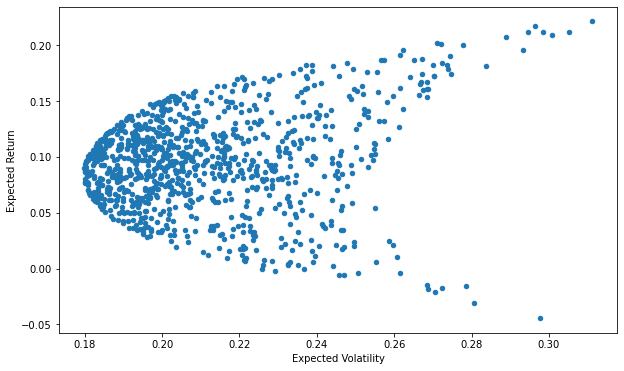

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')